In [73]:
import control as ct
import matplotlib.pyplot as plt
import sys
import time

s = ct.tf('s')
t = time.time()


In [74]:
Kps, h, d = 1, 5, 0.015
Kg, Tg = 1, 0.8
Kt, Tt = 1, 0.3
R = 0.05

In [75]:
# Feedback loop
droop = -R
Kp = 5
Ki = 0.08
Kd = 15

# Transfer function of Generator plant
generator = Kps / (2*h*s + d)
# Defining set point value for frequency
ref = 10

# Transfer functions of PID, Governor, Turbine and Load Change
#e = ref - i
pid = Kp + Ki/s + Kd*s
governor = Kg / (1 + Tg*s)
turbine = Kt / (1 + Tt*s)
delta_p = 1/s

In [76]:
ol1 = ct.series(governor,turbine)
cl_sys_1 = ct.feedback(ol1,pid)
cl_sys_2 = cl_sys_1
controlled_system = cl_sys_2 - delta_p
single_area = ct.series(controlled_system,generator)




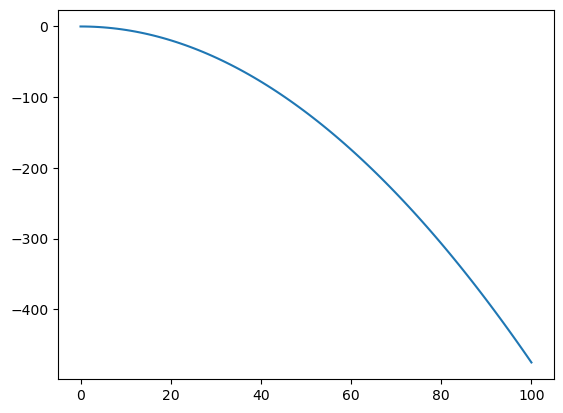

In [77]:
response = ct.step_response(single_area, T = 100)

#i = response.outputs

plt.plot(response.time, response.outputs)

plt.show()